In [1]:
#switched to elu, no generator, less cropping, doesn't work

In [2]:
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.layers.convolutional import Conv2D, Cropping2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras import backend as K
from keras.optimizers import SGD
from tqdm import tqdm
import random

#print(K.image_data_format())
#'channels_first'
#K.set_image_data_format('channels_last')
#print(K.image_data_format())

images_list = []
split = 8000

data = pd.read_csv('mydata2/driving_log.csv')


Using TensorFlow backend.


all data (27241, 1)
all images (27241, 1)
all data [[-0.00595238]
 [ 0.00446429]
 [-0.01525822]
 ..., 
 [-0.01877934]
 [ 0.00446429]
 [-0.03521127]]
all images [[ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_05_07_23_606.jpg']
 [ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_04_59_19_754.jpg']
 [ '/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_19_644.jpg']
 ..., 
 [ '/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_51_838.jpg']
 [ 'S:\\AI NEURAL NETWORKS PYTHON UDACITY\\UDACITY - MY CAR NANODEGREE\\p3\\mydata2\\IMG\\center_2017_07_10_05_10_38_946.jpg']
 [ '/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_00_811.jpg']]
[-404.7619]
[ 383.8028]
<class 

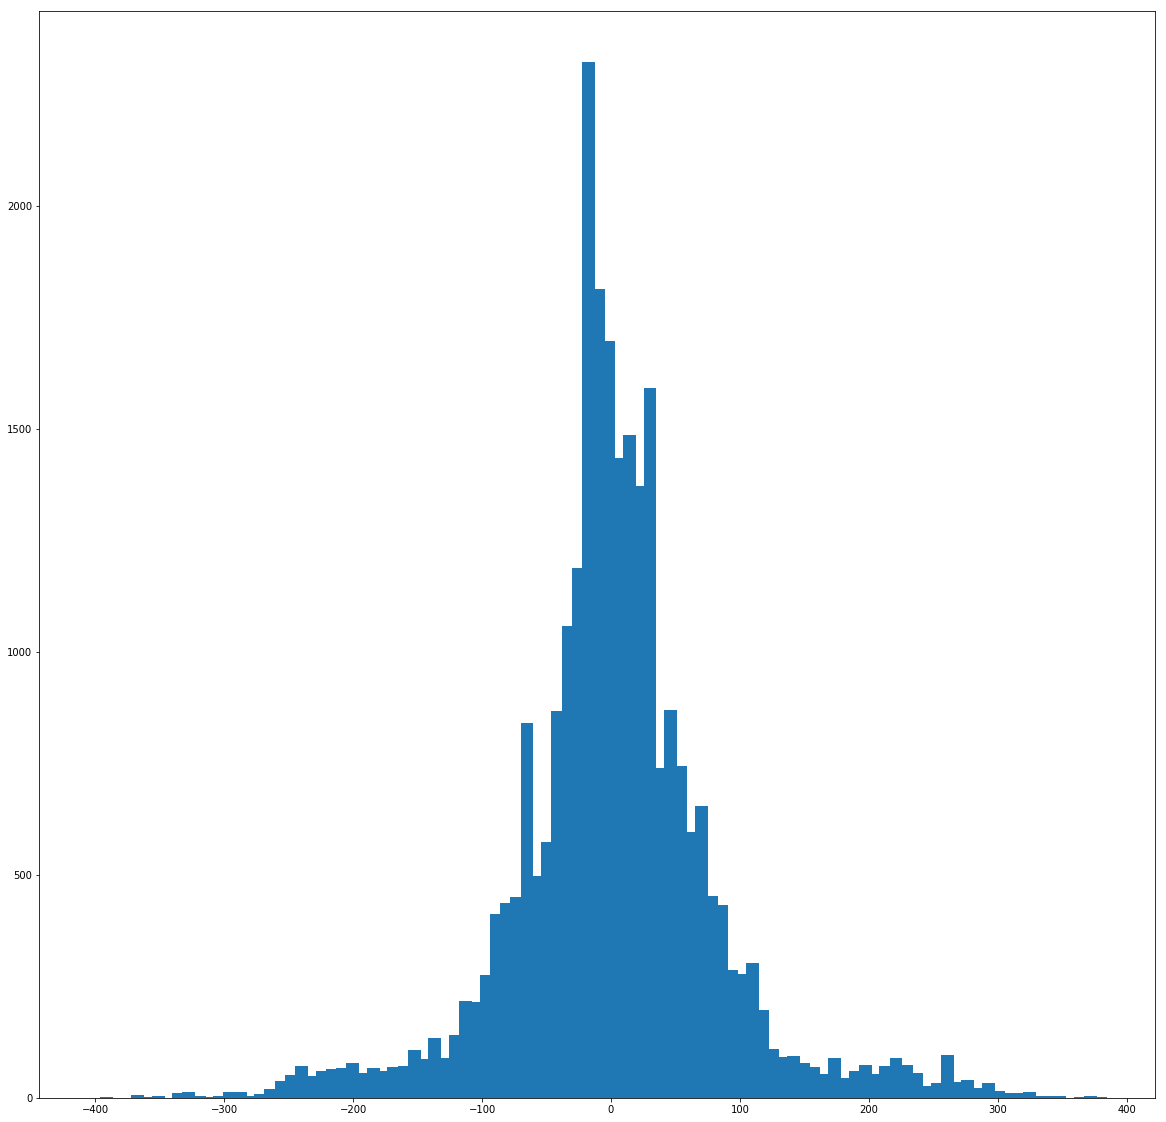

sharp_turn_images (2904,)
bsharp_turn_data (2904,)
straight_drv_images (24337,)
straight_drv_data (24337,)
straight_drv_images (2433,)
straight_drv_data (2433,)
All (8241,)
All (8241,)
turn mag type <class 'numpy.ndarray'>
turn mag full [-136.9048    207.7465   -254.6948   ...,   -7.440476    8.928572
   -7.440476]
-404.7619
383.8028
<class 'numpy.ndarray'>
<class 'numpy.float64'>
[-404.         -396.05050505 -388.1010101  -380.15151515 -372.2020202
 -364.25252525 -356.3030303  -348.35353535 -340.4040404  -332.45454545
 -324.50505051 -316.55555556 -308.60606061 -300.65656566 -292.70707071
 -284.75757576 -276.80808081 -268.85858586 -260.90909091 -252.95959596
 -245.01010101 -237.06060606 -229.11111111 -221.16161616 -213.21212121
 -205.26262626 -197.31313131 -189.36363636 -181.41414141 -173.46464646
 -165.51515152 -157.56565657 -149.61616162 -141.66666667 -133.71717172
 -125.76767677 -117.81818182 -109.86868687 -101.91919192  -93.96969697
  -86.02020202  -78.07070707  -70.12121212  -62.1

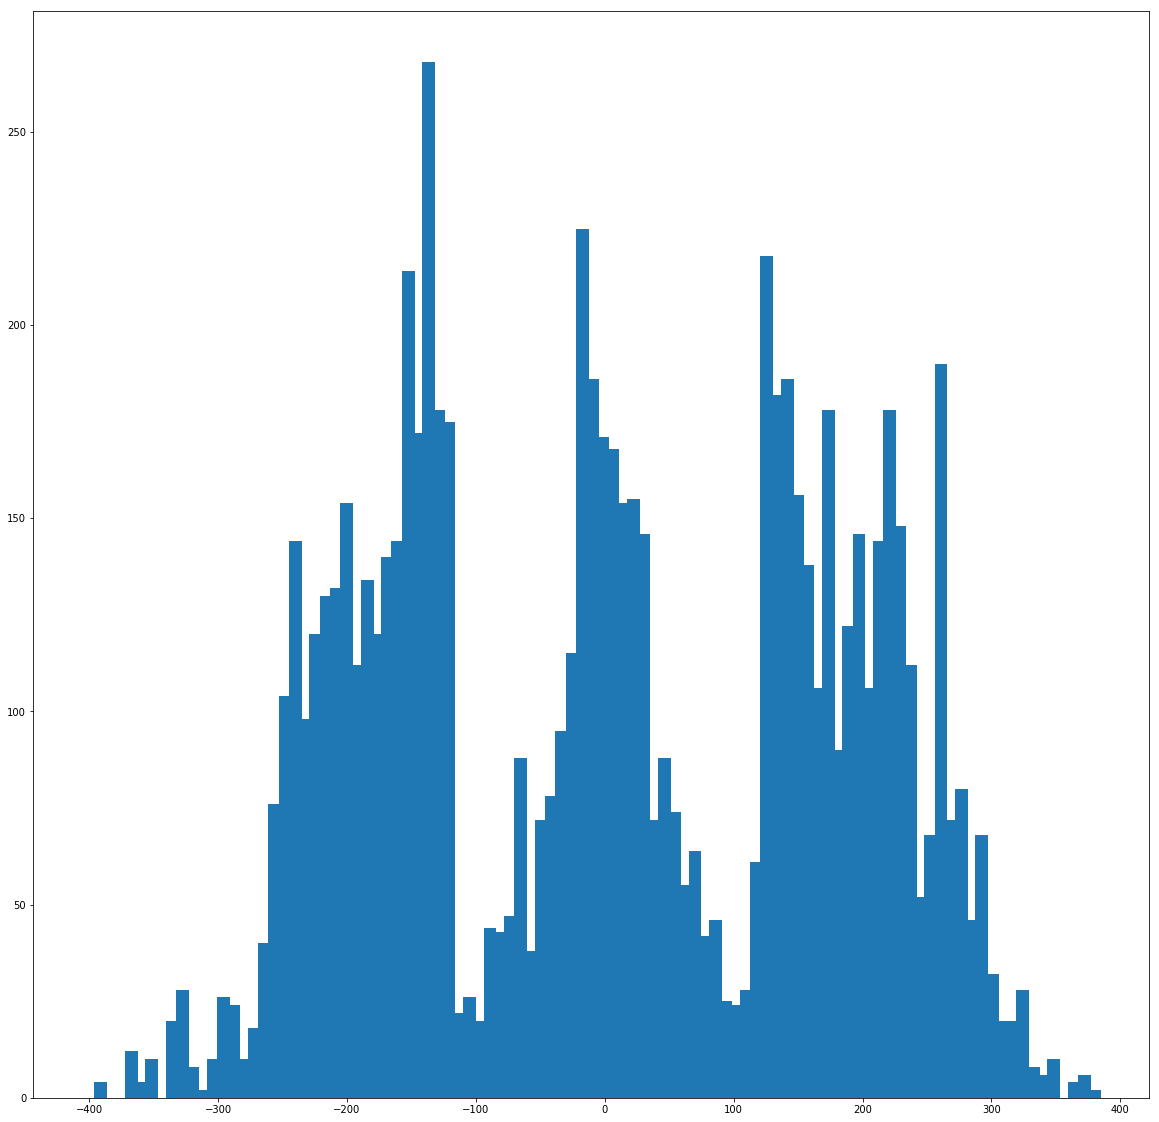

In [3]:



from sklearn.utils import shuffle
new_list = shuffle(data)
straight_threshold = 0.12

better_data_steering = new_list.iloc[:,[3]].as_matrix()
better_data_images = new_list.iloc[:,[0]].as_matrix()

print ("all data", better_data_steering.shape)
print ("all images", better_data_images.shape)


print ("all data", better_data_steering)
print ("all images", better_data_images)

turn_list = better_data_steering * 1000

print (min(turn_list))
print (max(turn_list))
print (type(turn_list))
print (type(turn_list[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins = np.linspace(math.ceil(min(turn_list)), 
                   math.floor(max(turn_list)),
                   100) # fixed number of bins
print (bins)

plt.figure(figsize=(20,20))
plt.hist(turn_list, bins=bins, width=10)
plt.show()



sharp_turn_images = better_data_images[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
sharp_turn_data   = better_data_steering[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
print ("sharp_turn_images",sharp_turn_images.shape)
print ("bsharp_turn_data",sharp_turn_data.shape)

straight_drv_images = better_data_images[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
straight_drv_data = better_data_steering[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


straight_drv_images =straight_drv_images [:straight_drv_images.shape[0]//10]
straight_drv_data =straight_drv_data [:straight_drv_data.shape[0]//10]

print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


all_images  = np.concatenate ((sharp_turn_images, sharp_turn_images, straight_drv_images), axis=0)
all_data  = np.concatenate ((sharp_turn_data, sharp_turn_data, straight_drv_data), axis=0)

print ("All",all_data.shape)
print ("All",all_images.shape)

turn_mag2 = all_data*1000
print ("turn mag type", type(turn_mag2))
print ("turn mag full", turn_mag2)

#turn_list = turn_mag.values.tolist()
turn_list2 = turn_mag2

print (min(turn_list2))
print (max(turn_list2))
print (type(turn_list2))
print (type(turn_list2[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins2 = np.linspace(math.ceil(min(turn_list2)), 
                   math.floor(max(turn_list2)),
                   100) # fixed number of bins
print (bins2)

plt.figure(figsize=(20,20))
plt.hist(turn_list2, bins=bins2, width=10)
plt.show()


In [4]:
c = list(zip(all_data, all_images))
random.shuffle(c)
all_data, all_images = zip(*c)


names = all_images

for name in tqdm(names):
    print (name)
    #print (name.split('\\'))
    if name.startswith('/'):
        #print (name.split('/'))
        path = 'mydata2/IMG/'+name.split('/')[9]
        #print ("media",path)
    else:
        #print (name.split('\\'))
        path = 'mydata2/IMG/'+name.split('\\')[6]
        #print (path)
    
    image = cv2.imread(path)
    image = image[...,::-1] #conversion to rgb
    #plt.imshow(image)
    #plt.show()
    #print(image)
    images_list.append(image)
    

print ("image list", np.array(images_list).shape)

X_train = np.array(images_list[:split])
y_train = all_data[:split]
y_train = np.expand_dims(y_train, axis=1)

X_valid = np.array(images_list[split:])
y_valid = all_data[split:]
y_valid = np.expand_dims(y_valid, axis=1)

print("x train shape",X_train.shape)
print("y train shape",y_train.shape)

print("x valid shape",X_valid.shape)
print("y valid shape", y_valid.shape)


def nvidia_model():
    model = Sequential()
    nv_model = Sequential()
    nv_model.add (Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    nv_model.add (Cropping2D(cropping=((30,20), (0,0)), input_shape=(160,320,3)))
    
    nv_model.add (Conv2D(24, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))

    nv_model.add (Conv2D(36, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))
        
    nv_model.add (Conv2D(48, (5,5), strides=1, padding="valid"))
    nv_model.add (ELU())
    nv_model.add ((MaxPooling2D(pool_size=(2,2))))
    
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid"))
    nv_model.add (ELU())
    
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid"))
    nv_model.add (ELU())
    
     
    nv_model.add(Flatten())
    nv_model.add(Dense(1164))
    nv_model.add(ELU())
    nv_model.add(Dense(100))
    nv_model.add(ELU())
    nv_model.add(Dense(50))
    nv_model.add(ELU())
    nv_model.add(Dense(10))
    nv_model.add(ELU())
    
    nv_model.add(Dense(1))
    nv_model.compile(optimizer="adam", metrics=['accuracy'], loss="mse")
    return nv_model

my_model = nvidia_model()


my_model.fit(X_train, y_train,  validation_data=(X_valid,y_valid), shuffle=True, batch_size=32, epochs=5, verbose=1)
my_model.save("model.h5")
#score = model.evaluate(x_test, y_test, batch_size=32)



  0%|          | 0/8241 [00:00<?, ?it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_21_229.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_22_086.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_56_659.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_58_821.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_56_700.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_45_545.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_13_776.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_47_034.jpg
S:\AI NEURAL NETWORKS P

  0%|          | 28/8241 [00:00<03:44, 36.61it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_58_267.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_25_622.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_29_934.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_01_062.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_50_194.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_35_607.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_40_862.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_50_788.jpg
S:\AI NEURAL NETWORKS P

  2%|▏         | 145/8241 [00:01<02:15, 59.91it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_12_797.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_48_231.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_01_517.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_46_857.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_49_243.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_35_245.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_01_746.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_46_187.jpg
S:\AI NEURAL NETWORKS P

  3%|▎         | 283/8241 [00:01<01:10, 112.12it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_33_331.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_22_775.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_35_499.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_36_627.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_25_567.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_21_967.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_10_583.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_08_332.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

  6%|▌         | 492/8241 [00:02<00:37, 205.72it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_05_446.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_50_120.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_33_792.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_39_40_185.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_35_887.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_45_762.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_46_592.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_49_725.jpg
S:\AI NEURAL NETWORKS P

  8%|▊         | 693/8241 [00:02<00:21, 345.88it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_00_421.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_07_219.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_17_603.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_10_052.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_22_037.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_14_410.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_53_766.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_58_121.jpg
S:\A

 11%|█         | 883/8241 [00:02<00:14, 492.29it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_22_593.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_59_405.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_55_069.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_10_311.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_11_172.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_24_699.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_18_495.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_23_867.jpg
S:\AI NEURAL NETWORKS P

 13%|█▎        | 1088/8241 [00:02<00:10, 670.59it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_50_504.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_25_260.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_44_662.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_49_514.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_26_641.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_58_745.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_15_470.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_47_501.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEG

 16%|█▌        | 1319/8241 [00:02<00:08, 852.45it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_11_330.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_12_025.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_59_302.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_59_204.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_45_636.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_00_669.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_10_779.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_09_695.jpg
/media/michal/DawneF4/A

 18%|█▊        | 1520/8241 [00:03<00:08, 813.88it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_14_465.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_14_998.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_37_876.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_08_978.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_39_443.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_34_443.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_10_645.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_36_768.jpg
/media/michal/DawneF4/A

 21%|██        | 1707/8241 [00:03<00:07, 853.05it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_37_805.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_25_845.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_09_825.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_46_425.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_39_707.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_59_678.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_08_218.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_36_255.jpg
S:\AI NEURAL NETWORKS P

 23%|██▎       | 1897/8241 [00:03<00:07, 896.63it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_01_532.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_24_721.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_37_761.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_44_653.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_34_288.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_38_776.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_21_897.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_19_276.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 26%|██▌       | 2125/8241 [00:03<00:06, 998.01it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_55_984.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_21_907.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_00_205.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_09_500.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_24_545.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_49_423.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_45_577.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_56_492.jpg
/media/michal/DawneF4/A

 27%|██▋       | 2228/8241 [00:03<00:06, 961.18it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_03_222.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_59_031.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_18_191.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_15_729.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_48_384.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_22_388.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_46_681.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_13_273.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACI

 29%|██▉       | 2427/8241 [00:04<00:06, 928.16it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_37_755.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_043.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_59_284.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_202.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_21_285.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_32_509.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_02_345.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_34_210.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 32%|███▏      | 2637/8241 [00:04<00:06, 890.59it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_58_513.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_50_711.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_58_518.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_47_931.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_24_838.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_48_282.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_59_041.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_49_616.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

 34%|███▍      | 2829/8241 [00:04<00:05, 917.62it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_16_081.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_20_248.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_35_578.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_39_097.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_01_352.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_26_346.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_00_943.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/c

 35%|███▌      | 2923/8241 [00:04<00:05, 906.64it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_37_574.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_26_419.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_34_415.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_50_791.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_13_423.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_00_421.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_57_422.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_52_576.jpg
/media/michal/DawneF4/A

 38%|███▊      | 3098/8241 [00:05<00:07, 705.47it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_48_283.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_22_082.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_18_133.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_21_157.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_47_777.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_09_571.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_14_383.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_30_671.jpg
S:\AI NEURAL NETWORKS P

 40%|███▉      | 3284/8241 [00:05<00:06, 781.11it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_10_344.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_00_757.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_182.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_45_854.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_39_629.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_48_209.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_31_991.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_34_742.jpg
/media/michal/DawneF4/A

 43%|████▎     | 3520/8241 [00:05<00:05, 943.57it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_34_497.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_35_732.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_50_488.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_23_033.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_24_596.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_38_002.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_13_863.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_46_735.jpg
S:\AI NEURAL NETWORKS P

 45%|████▌     | 3743/8241 [00:05<00:04, 1026.84it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_12_750.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_16_673.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_32_363.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_182.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_19_645.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_47_089.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_20_730.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_58_688.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 48%|████▊     | 3964/8241 [00:05<00:04, 1028.88it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_21_694.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_35_06_909.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_27_671.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_03_657.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_02_760.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_12_133.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_10_885.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06

 49%|████▉     | 4070/8241 [00:05<00:04, 1001.43it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_16_424.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_13_708.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_26_544.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_23_372.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_46_672.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_43_174.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_09_610.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_49_369.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\

 52%|█████▏    | 4274/8241 [00:06<00:04, 836.29it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_43_353.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_27_127.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_48_658.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_33_602.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_16_809.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_25_416.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_34_128.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_532.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 53%|█████▎    | 4363/8241 [00:06<00:05, 736.99it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_51_708.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_066.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_24_330.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_01_59_633.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_30_910.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_25_458.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_37_354.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_24_376.jpg
S:\AI NEURAL NETWORKS P

 55%|█████▍    | 4531/8241 [00:06<00:04, 757.20it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_27_712.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_02_035.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_23_491.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_51_536.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_29_021.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_58_821.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_11_591.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_58_890.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 57%|█████▋    | 4691/8241 [00:06<00:04, 736.48it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_57_671.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_05_375.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_01_781.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_20_930.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_47_191.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_28_440.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_14_163.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_00_939.jpg
S:\A

 59%|█████▉    | 4875/8241 [00:07<00:04, 787.33it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_01_669.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_08_834.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_34_751.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_45_466.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_28_915.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_57_748.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_57_819.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_11_768.jpg
S:\AI NEURAL NETWORKS P

 61%|██████▏   | 5062/8241 [00:07<00:03, 823.22it/s]


/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_34_487.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_12_456.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_33_368.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_26_291.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_14_011.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_24_670.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_03_19_725.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_11_858.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDAC

 64%|██████▍   | 5285/8241 [00:07<00:03, 940.43it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_43_692.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_57_362.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_12_275.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_33_124.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_13_986.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_25_254.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_23_018.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_12_989.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEG

 65%|██████▌   | 5397/8241 [00:07<00:02, 985.71it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_46_255.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_10_928.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_45_499.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_47_712.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_47_730.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_43_193.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_15_711.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_36_462.jpg
/med

 68%|██████▊   | 5602/8241 [00:07<00:02, 940.39it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_11_171.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_12_971.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_39_174.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_23_617.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_37_229.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_45_246.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_28_260.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_34_148.jpg
/media/michal/DawneF4/

 70%|███████   | 5792/8241 [00:08<00:02, 879.50it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_50_692.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_32_421.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_00_205.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_13_283.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_21_587.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_36_911.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_03_374.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_51_431.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 73%|███████▎  | 6007/8241 [00:08<00:02, 967.58it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_48_014.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_51_913.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_55_367.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_37_256.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_48_274.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_197.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_23_012.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_33_488.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 76%|███████▌  | 6235/8241 [00:08<00:02, 995.76it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_47_008.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_19_086.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_34_101.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_08_687.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_24_669.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_16_376.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_20_092.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_45_408.jpg
S:\AI NEURAL NETWORKS P

 78%|███████▊  | 6438/8241 [00:08<00:01, 970.18it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_17_093.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_26_011.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_22_012.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_11_251.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_58_139.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_32_994.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_12_275.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_203.jpg
S:\

 79%|███████▉  | 6537/8241 [00:08<00:01, 901.10it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_10_43_721.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_24_920.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_48_133.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_22_596.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_52_114.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_24_123.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_01_616.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_26_845.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\

 82%|████████▏ | 6744/8241 [00:08<00:01, 965.76it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_19_568.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_58_35_948.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_06_23_717.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_00_722.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_58_726.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_16_383.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_35_768.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_02_035.jpg
S:\A

 84%|████████▍ | 6963/8241 [00:09<00:01, 949.75it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_50_283.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_11_020.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_44_960.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_20_248.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_06_49_576.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_09_11_524.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_07_294.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_59_441.jpg
S:\AI NEURAL NETWORKS P

 87%|████████▋ | 7158/8241 [00:09<00:01, 920.53it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_33_458.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_22_679.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_37_539.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_02_118.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_43_882.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_46_224.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_22_235.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_07_34_817.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 89%|████████▉ | 7354/8241 [00:09<00:00, 916.71it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_42_51_469.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_21_145.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_197.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_11_591.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_36_530.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_35_234.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_36_074.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_40_36_811.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 92%|█████████▏| 7563/8241 [00:09<00:00, 978.98it/s]

/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_15_107.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_03_23_124.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_11_23_304.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_23_617.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_59_49_967.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_01_24_618.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_26_632.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_35_946.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI

 94%|█████████▍| 7776/8241 [00:10<00:00, 967.13it/s]

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_36_091.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_37_158.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_39_783.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_13_073.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_43_52_532.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_07_01_290.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_00_34_653.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_41_28_698.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEG

 96%|█████████▌| 7892/8241 [00:10<00:00, 1016.92it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_03_319.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_34_11_880.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_37_241.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata3/IMG/center_2017_07_16_05_43_35_743.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_19_556.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_05_35_589.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_20_732.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_12_36_078.jpg
S:\AI NEURAL NETWORKS 

 98%|█████████▊| 8101/8241 [00:10<00:00, 954.48it/s] 

S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_50_655.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_04_50_189.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_42_09_397.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_52_728.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_43_619.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_04_02_679.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_08_12_064.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_39_11_806.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS P

100%|██████████| 8241/8241 [00:10<00:00, 782.01it/s]


S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_02_47_414.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_09_06_40_26_582.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_09_38_231.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_02_10_018.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_04_57_22_119.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_08_03_895.jpg
/media/michal/DawneF4/AI NEURAL NETWORKS PYTHON UDACITY/UDACITY - MY CAR NANODEGREE/p3/mydata2/IMG/center_2017_07_15_05_05_07_965.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACITY - MY CAR NANODEGREE\p3\mydata2\IMG\center_2017_07_10_05_13_18_674.jpg
S:\AI NEURAL NETWORKS PYTHON UDACITY\UDACI